# Capstone Project
## *Check-in 2*

In this notebook:

* [Problem Statement](#problem-statement)
* [Exploring Spotify API Output via Spotipy](#explore-spotipy)

## Problem Statement <a class="anchor" id="problem-statement"></a>
<hr/>

I planned to create a tool that can be used by independent artists to promote new releases on Spotify which will generate a playlist that the artist can share with existing fans which includes their music along with music from popular artists in their genre.

### Goal 
Deliver a basic tool that can be used by independent artists to promote new releases on Spotify. This ideal end product will generate a playlist that the artist can share with existing fans which includes their music along with popular artists in their genre. The goal of this playlist is to associate the independent artist with more popular artists in their genre so that Spotify’s algorithms will start recommending them to new listeners who also like similar popular artists.

My personal learning goal: Coming from a predominantly academic background I am tired of producing analysis which includes some visualizations and a written discussion of outcomes. I would like to actually be able to produce a product of some kind that could be used by someone (even if that product is super basic and catered to a super niche need). Also, I’d really like to work for Spotify.
### Data
Data will come directly from the Spotify API. The goal is to pull a reasonably sized set of data in which to train a model to predict or ‘discover’ relevant artists. Spotify provides a popularity parameter in addition to other parameters like “danceability”, “speechiness” and “energy”, for every track hosted on their system. My dataset is not “in hand” so to speak but I have started working on pulling data this week.
End product: A basic website/tool in which an artist can enter in a Spotify Track ID and see a playlist (or possibly just a list) of similar sounding artists along with their tracks (where these artists are more popular than the independent artist seeking the playlist).

### Possible issues/problems
The biggest problem here will be that there is no real way to assess (at least numerically) the resulting playlist. I will also have no way to demonstrate that this playlist generated actually improved plays for the independent artist. I know of exactly one real world demonstration of a band successfully using this method to increase streams of their newly released album and gain new listeners. The assessment of how good the playlist generated will also be more qualitative than anything else. I will need to think more about how this could be better tested.
Isn’t this already what Spotify does? Obviously Spotify already recommends new artists and tracks to users. Why reinvent the wheel? The idea here is to really see how well a ‘simple’ model (or one designed by someone who does not work at Spotify with access to their algorithms) can achieve similar results for a specific use. I know many independent artists in the Boston area that have a ‘distrust’ of Spotify’s recommendation system. The music industry has a long history of being corrupt and ‘rigged’ to favor artists that are signed to labels or are already successful. Many artists don’t trust that their music is really being promoted in the same way that major artists are. Spotify claims that most of their playlists are generated algorithmically but many of them are actually not. There have been accusations in the past of Spotify employing the same “pay for play” access that was often used in the past to get a song on the radio. Spotify denies these claims, but the distrust by independent artists remains the same.

Ultimately, the goal is to build a tool that looks at the data in a transparent way to make a (hopefully relevant) playlist recommendation for use by the artists themselves to use in promoting their own music.


## Issues Encountered
After exploring the Spotify API I have discovered that I will not be able to pull the information I will need in the way that I need it.

I now need to either find a complimentary data set or adjust the problem I will be approaching.

#### Import Libraries & Read in Data

In [2]:
## standard imports 
import pandas as pd 
import numpy as np
import seaborn as sns

import re
## visualizations
import matplotlib.pyplot as plt

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


# ## options
# import sklearn
# pd.options.display.max_rows = 4000
# pd.options.display.max_columns = 100
# pd.set_option('max_colwidth', 100)

In [3]:
### Spotify Credentials - must be set in local environment to run
auth_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(auth_manager=auth_manager)

##  <a class="anchor" id="explore-spotipy"></a>
<hr/>


https://spotipy.readthedocs.io/en/2.16.0/#

### Learning how Spotify API returns info 

In [6]:
### ARTIST - Dalton & the Sheriffs
daltonURI = 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'
daltonID = daltonURI.rsplit('/', 1)[-1]

lannenFallURI = 'https://open.spotify.com/artist/4xLmFQS5mGmWv10FAXMlwT'
lannenURI = 'https://open.spotify.com/artist/51HrEYveVqvRgJAkvHndnO'

theScenicURI = 'https://open.spotify.com/artist/5XVnRkU3WdpNw4xlYKq4kU'

### ALBUM - Luckier by Half
luckierURI = 'https://open.spotify.com/album/1v8tMGSGAsAn4KD78DFLq8'

### SONGS 
## Daves Street
davesURI =' https://open.spotify.com/track/6em7Fr61PoOQLH9TkSHMGD?si=OlULtmUoTgyIzSdlrENk4w'

## Holding On
holdingURI = 'https://open.spotify.com/track/4vciFvUV0oLrkKrWrl00dS?si=SUixsbS2SJ2ayqYolV7z3A'

## You Ain't Her
youherURI = 'https://open.spotify.com/track/5UhjLywLttQtwI2EH5ZqPT'

### PLAYLISTS - This is ...
thisisURI = 'https://open.spotify.com/playlist/37i9dQZF1DZ06evO3GB840'

## Playing with Artist Information <a class="anchor" id="play-artist-info"></a>
<hr/>

In [42]:
dalton = sp.artist(daltonID)

In [55]:
dalton['popularity']

23

In [61]:
lannenFall = sp.artist(lannenFallURI)

In [62]:
lannenFall

{'external_urls': {'spotify': 'https://open.spotify.com/artist/4xLmFQS5mGmWv10FAXMlwT'},
 'followers': {'href': None, 'total': 116},
 'genres': [],
 'href': 'https://api.spotify.com/v1/artists/4xLmFQS5mGmWv10FAXMlwT',
 'id': '4xLmFQS5mGmWv10FAXMlwT',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab67616d0000b273b3ff65d137b41d0510aabc3d',
   'width': 640},
  {'height': 300,
   'url': 'https://i.scdn.co/image/ab67616d00001e02b3ff65d137b41d0510aabc3d',
   'width': 300},
  {'height': 64,
   'url': 'https://i.scdn.co/image/ab67616d00004851b3ff65d137b41d0510aabc3d',
   'width': 64}],
 'name': 'Lannen Fall',
 'popularity': 1,
 'type': 'artist',
 'uri': 'spotify:artist:4xLmFQS5mGmWv10FAXMlwT'}

In [68]:
lannenFall['popularity']

1

In [57]:
lannen = sp.artist(lannenURI)

In [59]:
lannen

{'external_urls': {'spotify': 'https://open.spotify.com/artist/51HrEYveVqvRgJAkvHndnO'},
 'followers': {'href': None, 'total': 108},
 'genres': [],
 'href': 'https://api.spotify.com/v1/artists/51HrEYveVqvRgJAkvHndnO',
 'id': '51HrEYveVqvRgJAkvHndnO',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/e83b14ea0ac3f88564589c23ca023e814ff4e95b',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/76006beb487c0fa735b494660c020ef959d1a948',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/3b9c5d5ab04d66a80383b4c40c0389c3a1544989',
   'width': 160}],
 'name': 'Lannen',
 'popularity': 0,
 'type': 'artist',
 'uri': 'spotify:artist:51HrEYveVqvRgJAkvHndnO'}

In [64]:
lannen['popularity']

0

In [82]:
lannen['followers']['total']

108

In [65]:
theScenic = sp.artist(theScenicURI)

In [67]:
theScenic

{'external_urls': {'spotify': 'https://open.spotify.com/artist/5XVnRkU3WdpNw4xlYKq4kU'},
 'followers': {'href': None, 'total': 769},
 'genres': ['neon pop punk'],
 'href': 'https://api.spotify.com/v1/artists/5XVnRkU3WdpNw4xlYKq4kU',
 'id': '5XVnRkU3WdpNw4xlYKq4kU',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab67616d0000b2739bd1912f7cf2fd30a6ffd7f5',
   'width': 640},
  {'height': 300,
   'url': 'https://i.scdn.co/image/ab67616d00001e029bd1912f7cf2fd30a6ffd7f5',
   'width': 300},
  {'height': 64,
   'url': 'https://i.scdn.co/image/ab67616d000048519bd1912f7cf2fd30a6ffd7f5',
   'width': 64}],
 'name': 'The Scenic',
 'popularity': 7,
 'type': 'artist',
 'uri': 'spotify:artist:5XVnRkU3WdpNw4xlYKq4kU'}

In [66]:
theScenic['popularity']

7

In [93]:
bands = ['Lannen Fall', 'The Scenic', 'Lannen', 'Dalton &\n the Sheriffs']

jayBandPop = [lannenFall['popularity'], theScenic['popularity'],lannen['popularity'], dalton['popularity']]

Text(0.5, 1.0, 'Popularity of Bands with Jay Tagg')

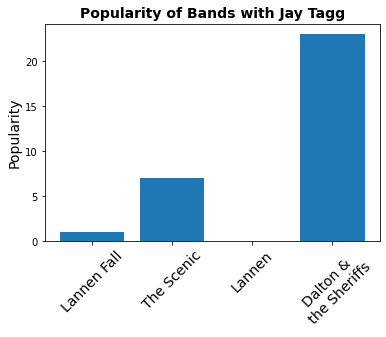

In [94]:
plt.bar(bands, jayBandPop)
plt.xticks(rotation=45, fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.title('Popularity of Bands with Jay Tagg', fontweight='bold', fontsize=14)

Text(0.5, 1.0, 'Number of Followers for Bands with Jay Tagg')

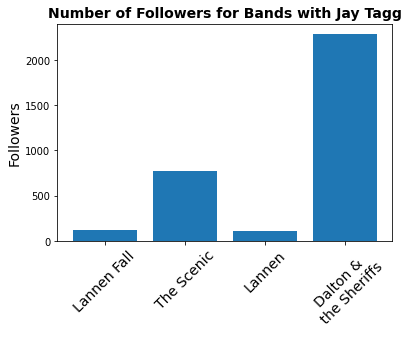

In [95]:
jayBandFollow = [lannenFall['followers']['total'], theScenic['followers']['total'],lannen['followers']['total'], dalton['followers']['total']]

plt.bar(bands, jayBandFollow)
plt.xticks(rotation=45, fontsize=14)
plt.ylabel('Followers', fontsize=14)
plt.title('Number of Followers for Bands with Jay Tagg', fontweight='bold', fontsize=14)

<ipython-input-105-612c40ec2bae>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(bands,rotation=45, fontsize=14)


Text(0.5, 1.0, 'Number of Followers for Bands with Jay Tagg')

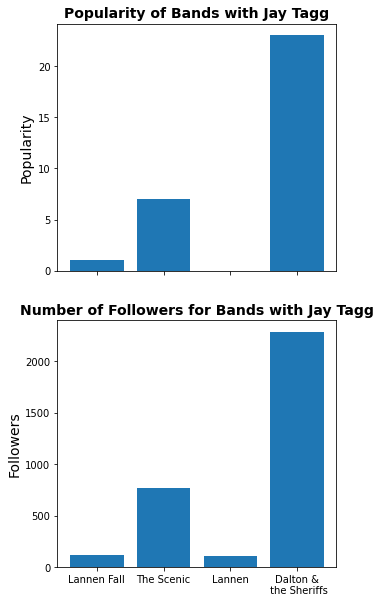

In [105]:
fig, ax = plt.subplots(2,1, sharex=True, figsize=(5,10))
ax[0].bar(bands, jayBandPop)
ax[0].set_xticklabels(bands,rotation=45, fontsize=14)
ax[0].set_ylabel('Popularity', fontsize=14)
ax[0].set_title('Popularity of Bands with Jay Tagg', fontweight='bold', fontsize=14)

ax[1].bar(bands, jayBandFollow)
# ax[1].set_xticks(rotation=45, fontsize=14)
ax[1].set_ylabel('Followers', fontsize=14)
ax[1].set_title('Number of Followers for Bands with Jay Tagg', fontweight='bold', fontsize=14)

In [46]:
# sp.artist_top_tracks(daltonID, country='US')

## Exploring Albums 

In [5]:
luckier = sp.album(luckierURI)

In [11]:
for key in luckier:
    print(key)

album_type
artists
available_markets
copyrights
external_ids
external_urls
genres
href
id
images
label
name
popularity
release_date
release_date_precision
total_tracks
tracks
type
uri


In [15]:
for key in luckier['tracks']:
    print(key)
    
# luckier['tracks']['items']

href
items
limit
next
offset
previous
total


In [16]:
# luckier
# luckier_df = pd.DataFrame.from_dict(luckier)
# lucker_df.head()

In [92]:
luckier_tracks = sp.album_tracks(luckierURI)

In [25]:
# count = 0
# for key in luckier_tracks['items']:
#     count += 1
#     print(key)
# print('key count: ', count)

In [35]:
type(luckier_tracks['items'])

list

In [71]:
luckier_tracks['items'][0].get('id')

'69hE9a6camKM2ZALPfckIV'

In [94]:
# luckier_tracks

In [42]:
track_list = []
raw_track_list = luckier_tracks['items'].copy()
# raw_track_list

In [46]:
# track_dict = luckier_tracks.copy()
# track_dict = dict(raw_track_list)
# track_dict

# raw_track_list[0].get('name')

# track_info = [raw_track_list[0].get('track_number'), raw_track_list[0].get('name'), raw_track_list.get('uri')]

In [47]:
for i in range(len(raw_track_list)):
    track_info = [raw_track_list[i].get('track_number'), raw_track_list[i].get('name'), raw_track_list[i].get('uri')]
    track_list.append(track_info)

In [48]:
track_list

[[1, 'Tell It Plain', 'spotify:track:69hE9a6camKM2ZALPfckIV'],
 [2, 'Cheap Seats', 'spotify:track:2pc4JumxjDqZ1b7DPwX33v'],
 [3, 'California Kid', 'spotify:track:6xaqmNbSGCmjEjiWyEwvA0'],
 [4, 'The Strummer', 'spotify:track:3E39MkTSUbIds3lY1wcfnL'],
 [5, 'Holding On', 'spotify:track:4vciFvUV0oLrkKrWrl00dS'],
 [6, 'Sunday Nights', 'spotify:track:09ybluJcnqeOE39ONdB7Hc'],
 [7, 'Boston', 'spotify:track:4HJ7mSMtHAdU55lLjGE4zW'],
 [8, 'Hand-Me-Down', 'spotify:track:3b9nCGWTyf7bTRKPvyC9S8'],
 [9, '80 Good', 'spotify:track:3Rt4CW4KLTNlVlpkrfuixM'],
 [10, 'Her Good Name', 'spotify:track:4tXJMxK2K4ITXRH6z9M26L'],
 [11, 'Bones', 'spotify:track:3JCpJihZb02ahRf59BPeVr'],
 [12, 'The Ballad of Southie', 'spotify:track:4j27PyoknqKy48NqRrZrgo'],
 [13, 'Daves Street', 'spotify:track:6em7Fr61PoOQLH9TkSHMGD'],
 [14, "St. Patrick's Day", 'spotify:track:5sKRZ31xRYhad8HIGmbQQD']]

In [54]:
luckier_df = pd.DataFrame(track_list, columns=['track_number', 'track_name', 'track_uri'])
luckier_df

track_number             track_name                             track_uri
0              1          Tell It Plain  spotify:track:69hE9a6camKM2ZALPfckIV
1              2            Cheap Seats  spotify:track:2pc4JumxjDqZ1b7DPwX33v
2              3         California Kid  spotify:track:6xaqmNbSGCmjEjiWyEwvA0
3              4           The Strummer  spotify:track:3E39MkTSUbIds3lY1wcfnL
4              5             Holding On  spotify:track:4vciFvUV0oLrkKrWrl00dS
5              6          Sunday Nights  spotify:track:09ybluJcnqeOE39ONdB7Hc
6              7                 Boston  spotify:track:4HJ7mSMtHAdU55lLjGE4zW
7              8           Hand-Me-Down  spotify:track:3b9nCGWTyf7bTRKPvyC9S8
8              9                80 Good  spotify:track:3Rt4CW4KLTNlVlpkrfuixM
9             10          Her Good Name  spotify:track:4tXJMxK2K4ITXRH6z9M26L
10            11                  Bones  spotify:track:3JCpJihZb02ahRf59BPeVr
11            12  The Ballad of Southie  spotify:track:4j27PyoknqKy48NqRrZrgo
12            13           Daves Street  spotify:track:6em7Fr61PoOQLH9TkSHMGD
13            14      St. Patrick's Day  spotify:track:5sKRZ31xRYhad8HIGmbQQD

In [56]:
type(luckier_df['track_uri'])

pandas.core.series.Series

In [57]:
### get audio features for a batch of tracks

track_audio_features = sp.audio_features(tracks=luckier_df['track_uri'].values.tolist())
# track_audio_features

In [72]:
test_df = pd.DataFrame.from_dict(track_audio_features)


In [75]:
# test_df.columns
drop_cols = ['type', 'id', 'uri', 'track_href', 'analysis_url']

In [77]:
test_df.drop(columns = drop_cols, inplace=True)

In [79]:
byhalf = pd.concat([luckier_df, test_df], axis=1)

In [80]:
byhalf.head()

track_number      track_name                             track_uri  \
0             1   Tell It Plain  spotify:track:69hE9a6camKM2ZALPfckIV   
1             2     Cheap Seats  spotify:track:2pc4JumxjDqZ1b7DPwX33v   
2             3  California Kid  spotify:track:6xaqmNbSGCmjEjiWyEwvA0   
3             4    The Strummer  spotify:track:3E39MkTSUbIds3lY1wcfnL   
4             5      Holding On  spotify:track:4vciFvUV0oLrkKrWrl00dS   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.401   0.810   10    -5.582     1       0.0505      0.001280   
1         0.532   0.927    2    -5.255     1       0.0403      0.000868   
2         0.446   0.940    7    -5.263     1       0.0683      0.001020   
3         0.326   0.995    7    -3.644     1       0.3500      0.000531   
4         0.594   0.858    7    -5.757     1       0.0264      0.000470   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  
0           0.04140    0.0770    0.338  159.795       243133               4  
1           0.00908    0.3700    0.707  100.024       231867               4  
2           0.07350    0.2990    0.386  127.941       186333               4  
3           0.38900    0.0548    0.429  216.020       186133               4  
4           0.23500    0.1420    0.431   99.999       209400               4

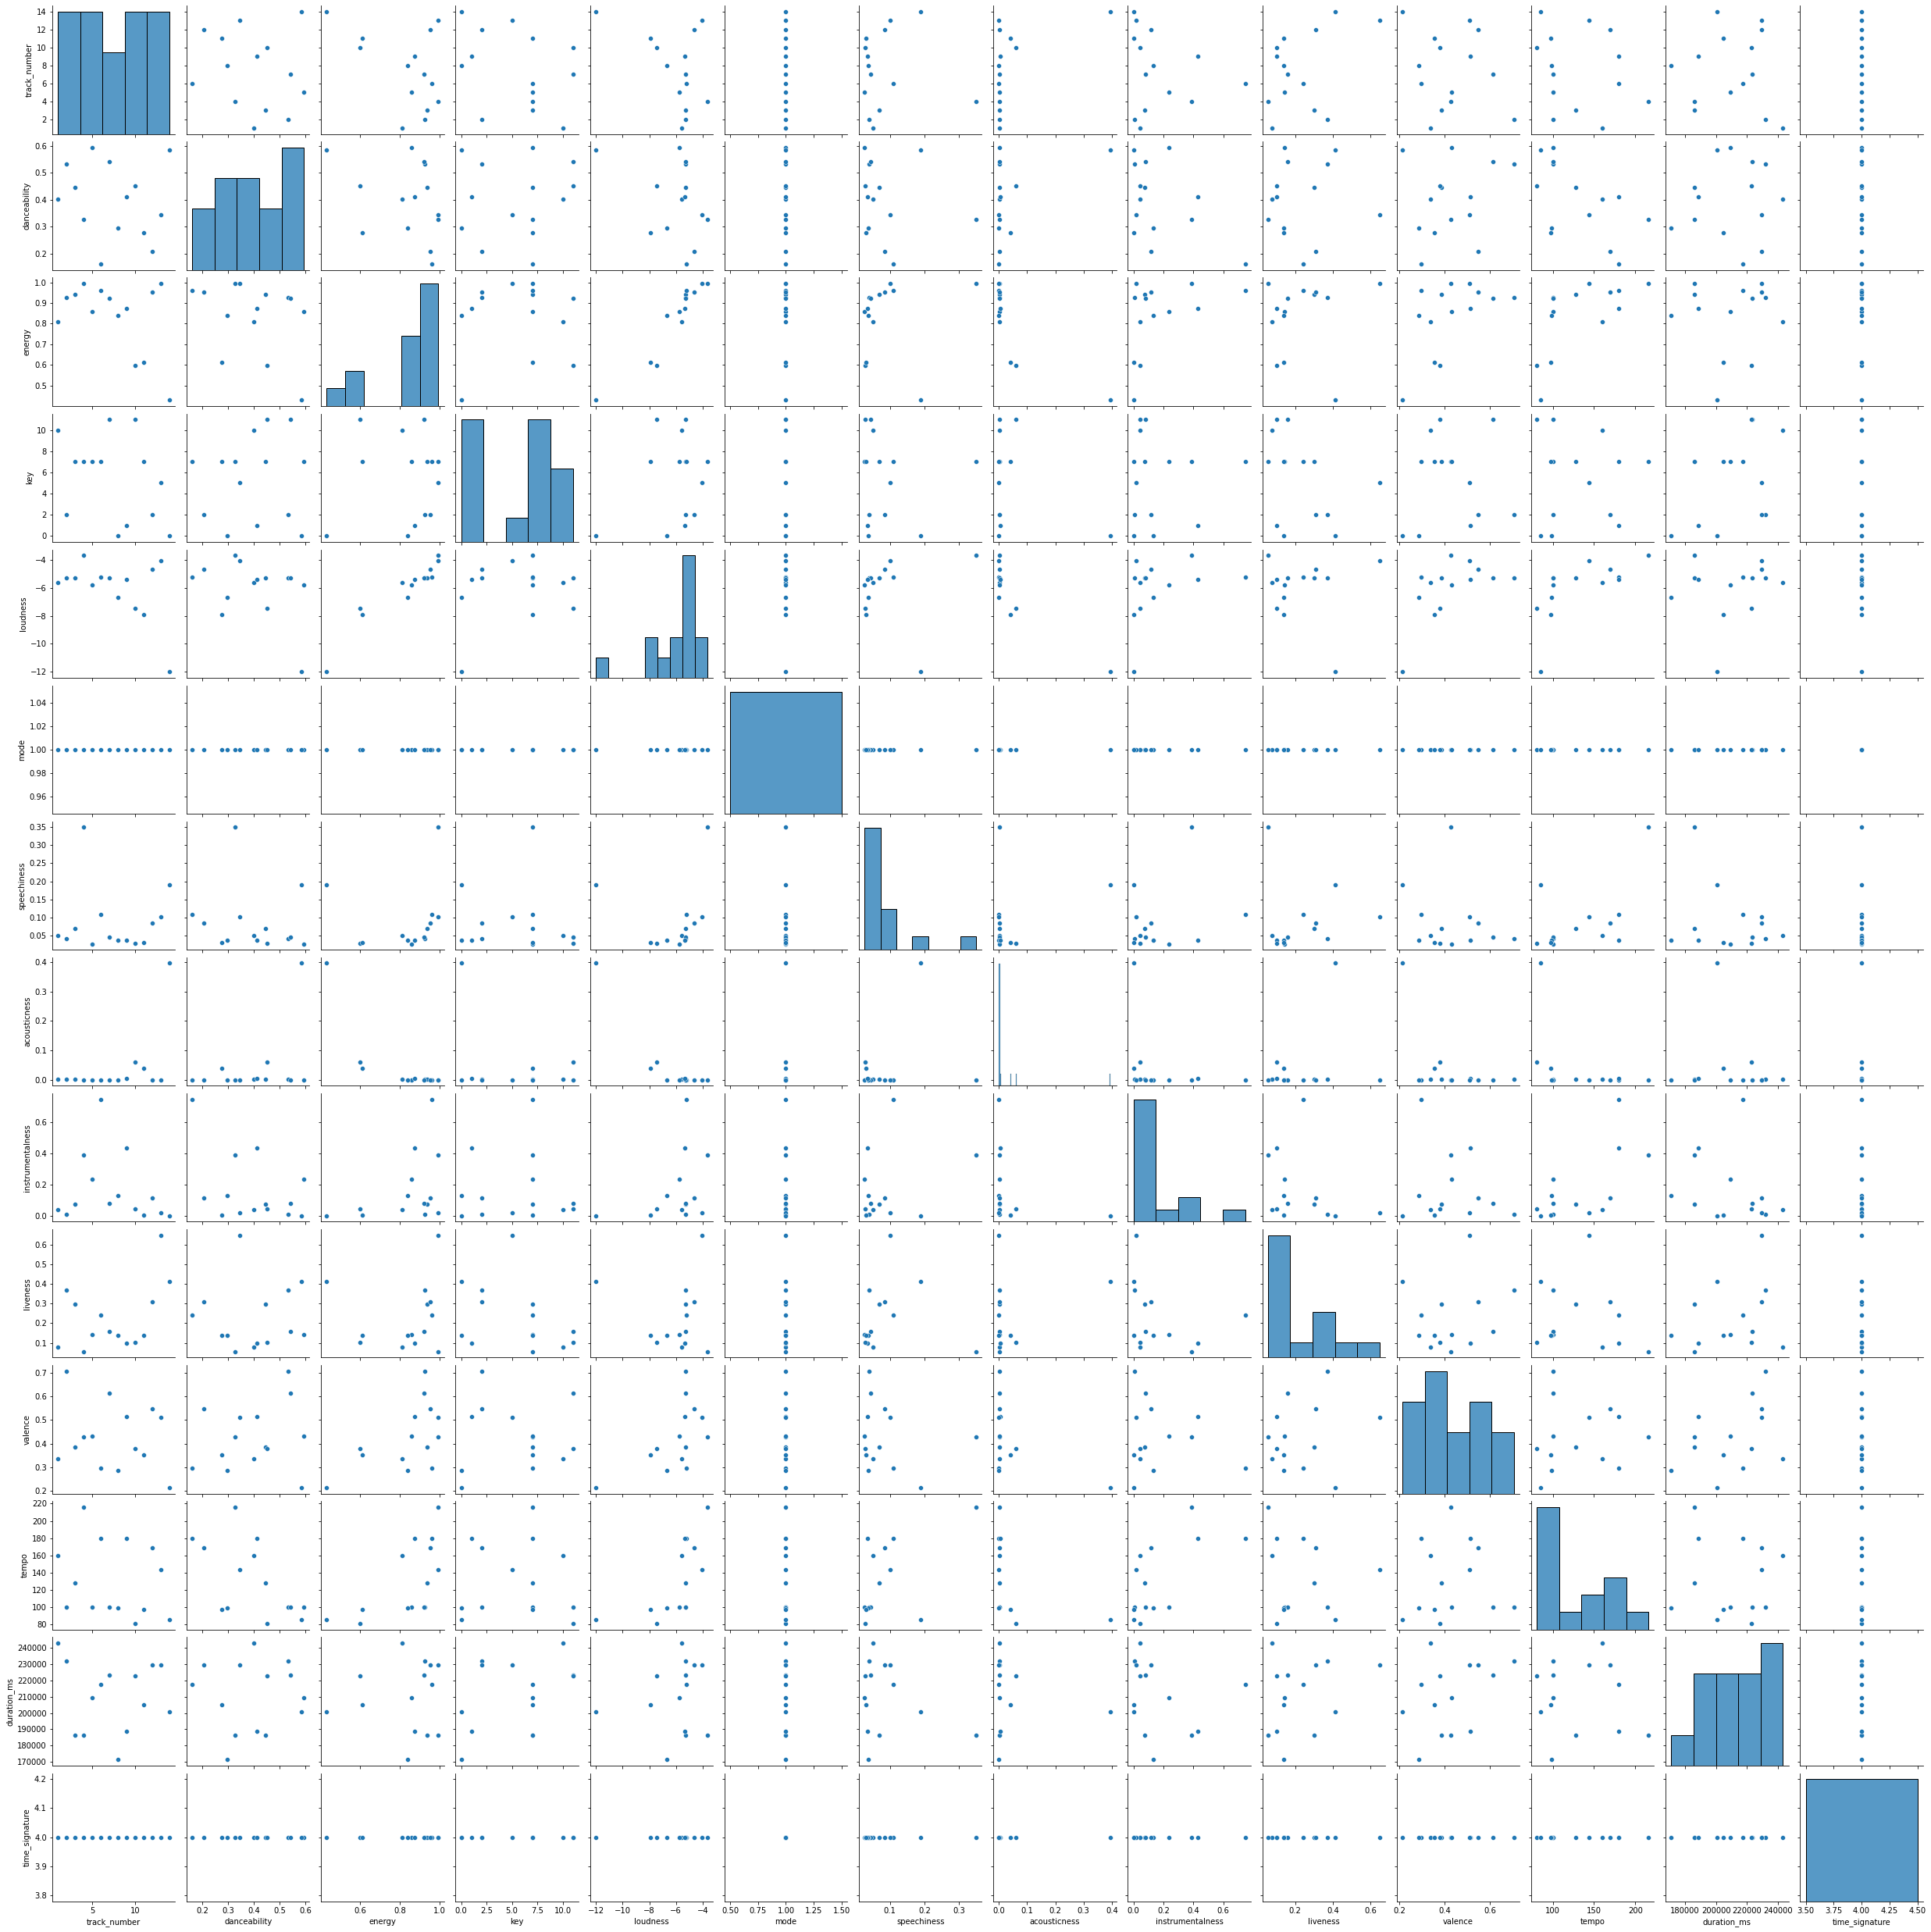

In [83]:
sns.pairplot(byhalf)

In [ ]:
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 243133, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/69hE9a6camKM2ZALPfckIV'}, 'href': 'https://api.spotify.com/v1/tracks/69hE9a6camKM2ZALPfckIV', 'id': '69hE9a6camKM2ZALPfckIV', 'is_local': False, 'is_playable': True, 'name': 'Tell It Plain', 'preview_url': 'https://p.scdn.co/mp3-preview/be48e0b0a31b7d6eb03f81b991102c2329fe098a?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 1, 'type': 'track', 'uri': 'spotify:track:69hE9a6camKM2ZALPfckIV'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 231866, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/2pc4JumxjDqZ1b7DPwX33v'}, 'href': 'https://api.spotify.com/v1/tracks/2pc4JumxjDqZ1b7DPwX33v', 'id': '2pc4JumxjDqZ1b7DPwX33v', 'is_local': False, 'is_playable': True, 'name': 'Cheap Seats', 'preview_url': 'https://p.scdn.co/mp3-preview/fbb756a1bb72526212c3f6aa7f69bdc00f473cf8?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 2, 'type': 'track', 'uri': 'spotify:track:2pc4JumxjDqZ1b7DPwX33v'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 186333, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/6xaqmNbSGCmjEjiWyEwvA0'}, 'href': 'https://api.spotify.com/v1/tracks/6xaqmNbSGCmjEjiWyEwvA0', 'id': '6xaqmNbSGCmjEjiWyEwvA0', 'is_local': False, 'is_playable': True, 'name': 'California Kid', 'preview_url': 'https://p.scdn.co/mp3-preview/bf2c31b7a3ad06f08f6df10389e230de8d565152?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 3, 'type': 'track', 'uri': 'spotify:track:6xaqmNbSGCmjEjiWyEwvA0'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 186133, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/3E39MkTSUbIds3lY1wcfnL'}, 'href': 'https://api.spotify.com/v1/tracks/3E39MkTSUbIds3lY1wcfnL', 'id': '3E39MkTSUbIds3lY1wcfnL', 'is_local': False, 'is_playable': True, 'name': 'The Strummer', 'preview_url': 'https://p.scdn.co/mp3-preview/07b56c3841f40324e3292f2066800bf8a1a1456d?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 4, 'type': 'track', 'uri': 'spotify:track:3E39MkTSUbIds3lY1wcfnL'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 209400, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/4vciFvUV0oLrkKrWrl00dS'}, 'href': 'https://api.spotify.com/v1/tracks/4vciFvUV0oLrkKrWrl00dS', 'id': '4vciFvUV0oLrkKrWrl00dS', 'is_local': False, 'is_playable': True, 'name': 'Holding On', 'preview_url': 'https://p.scdn.co/mp3-preview/80db2a1bbf431410990d68ecd0db282846e196aa?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 5, 'type': 'track', 'uri': 'spotify:track:4vciFvUV0oLrkKrWrl00dS'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 217426, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/09ybluJcnqeOE39ONdB7Hc'}, 'href': 'https://api.spotify.com/v1/tracks/09ybluJcnqeOE39ONdB7Hc', 'id': '09ybluJcnqeOE39ONdB7Hc', 'is_local': False, 'is_playable': True, 'name': 'Sunday Nights', 'preview_url': 'https://p.scdn.co/mp3-preview/119e340c678998c182c7f276bc797f728bfea590?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 6, 'type': 'track', 'uri': 'spotify:track:09ybluJcnqeOE39ONdB7Hc'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 223440, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/4HJ7mSMtHAdU55lLjGE4zW'}, 'href': 'https://api.spotify.com/v1/tracks/4HJ7mSMtHAdU55lLjGE4zW', 'id': '4HJ7mSMtHAdU55lLjGE4zW', 'is_local': False, 'is_playable': True, 'name': 'Boston', 'preview_url': 'https://p.scdn.co/mp3-preview/9a0440c9bf0c6f6bec153992f7574107e43a6f24?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 7, 'type': 'track', 'uri': 'spotify:track:4HJ7mSMtHAdU55lLjGE4zW'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 171226, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/3b9nCGWTyf7bTRKPvyC9S8'}, 'href': 'https://api.spotify.com/v1/tracks/3b9nCGWTyf7bTRKPvyC9S8', 'id': '3b9nCGWTyf7bTRKPvyC9S8', 'is_local': False, 'is_playable': True, 'name': 'Hand-Me-Down', 'preview_url': 'https://p.scdn.co/mp3-preview/bf20b12dd261b7f76454608b9079ab5c8cfeb2fd?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 8, 'type': 'track', 'uri': 'spotify:track:3b9nCGWTyf7bTRKPvyC9S8'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 188626, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/3Rt4CW4KLTNlVlpkrfuixM'}, 'href': 'https://api.spotify.com/v1/tracks/3Rt4CW4KLTNlVlpkrfuixM', 'id': '3Rt4CW4KLTNlVlpkrfuixM', 'is_local': False, 'is_playable': True, 'name': '80 Good', 'preview_url': 'https://p.scdn.co/mp3-preview/54ef6f35affba7e538491b00a9298b00dee6ba17?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 9, 'type': 'track', 'uri': 'spotify:track:3Rt4CW4KLTNlVlpkrfuixM'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 222880, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/4tXJMxK2K4ITXRH6z9M26L'}, 'href': 'https://api.spotify.com/v1/tracks/4tXJMxK2K4ITXRH6z9M26L', 'id': '4tXJMxK2K4ITXRH6z9M26L', 'is_local': False, 'is_playable': True, 'name': 'Her Good Name', 'preview_url': 'https://p.scdn.co/mp3-preview/625705444e2e6e53b00fa0b6208a3b115a7bf839?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 10, 'type': 'track', 'uri': 'spotify:track:4tXJMxK2K4ITXRH6z9M26L'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 204893, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/3JCpJihZb02ahRf59BPeVr'}, 'href': 'https://api.spotify.com/v1/tracks/3JCpJihZb02ahRf59BPeVr', 'id': '3JCpJihZb02ahRf59BPeVr', 'is_local': False, 'is_playable': True, 'name': 'Bones', 'preview_url': 'https://p.scdn.co/mp3-preview/c8522804103959c6c17a6664ae83e39851c03c9e?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 11, 'type': 'track', 'uri': 'spotify:track:3JCpJihZb02ahRf59BPeVr'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 229533, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/4j27PyoknqKy48NqRrZrgo'}, 'href': 'https://api.spotify.com/v1/tracks/4j27PyoknqKy48NqRrZrgo', 'id': '4j27PyoknqKy48NqRrZrgo', 'is_local': False, 'is_playable': True, 'name': 'The Ballad of Southie', 'preview_url': 'https://p.scdn.co/mp3-preview/c030bc9c9d962b2e06897e4edf79d57e63c54083?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 12, 'type': 'track', 'uri': 'spotify:track:4j27PyoknqKy48NqRrZrgo'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 229466, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/6em7Fr61PoOQLH9TkSHMGD'}, 'href': 'https://api.spotify.com/v1/tracks/6em7Fr61PoOQLH9TkSHMGD', 'id': '6em7Fr61PoOQLH9TkSHMGD', 'is_local': False, 'is_playable': True, 'name': 'Daves Street', 'preview_url': 'https://p.scdn.co/mp3-preview/e57993424bc07f7a55c746398721fe8a0ed025fc?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 13, 'type': 'track', 'uri': 'spotify:track:6em7Fr61PoOQLH9TkSHMGD'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 200840, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/5sKRZ31xRYhad8HIGmbQQD'}, 'href': 'https://api.spotify.com/v1/tracks/5sKRZ31xRYhad8HIGmbQQD', 'id': '5sKRZ31xRYhad8HIGmbQQD', 'is_local': False, 'is_playable': True, 'name': "St. Patrick's Day", 'preview_url': 'https://p.scdn.co/mp3-preview/56d2fcb0b79356cdaca9a4c350ccd703bcdb5a78?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 14, 'type': 'track', 'uri': 'spotify:track:5sKRZ31xRYhad8HIGmbQQD'}

In [3]:
mindup = 'spotify:track:4cXdWLcvruvi6OW7we4C7T'

sp.audio_features(mindup)

[{'danceability': 0.403,
  'energy': 0.721,
  'key': 3,
  'loudness': -5.714,
  'mode': 1,
  'speechiness': 0.033,
  'acousticness': 3.2e-05,
  'instrumentalness': 0.159,
  'liveness': 0.124,
  'valence': 0.389,
  'tempo': 139.963,
  'type': 'audio_features',
  'id': '4cXdWLcvruvi6OW7we4C7T',
  'uri': 'spotify:track:4cXdWLcvruvi6OW7we4C7T',
  'track_href': 'https://api.spotify.com/v1/tracks/4cXdWLcvruvi6OW7we4C7T',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4cXdWLcvruvi6OW7we4C7T',
  'duration_ms': 277320,
  'time_signature': 4}]

## Adapting Example from Spotipy Library <a class="anchor" id="topic-1"></a>
<hr/>


## Topic 2 <a class="anchor" id="topic-2"></a>
<hr/>

In [84]:
daves_st = sp.track(davesURI)

In [1]:
# daves_st

In [8]:
dalton_track_list = sp.tracks([davesURI, holdingURI, youherURI], market='US')

In [12]:
dalton_track_list['tracks'][0].get('popularity')

8